# Machine Learning Course - Day 10


In [1]:
# importamos la slibrerias
import pandas as pd
import numpy as np

In [3]:
# importamos la libreria que usaremos
df = pd.read_csv("http://virtualfif.uaq.mx/diplomado/data/student.csv")

In [8]:
# Revisamos como esta contruido nuestro data frame
df.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [11]:
# Obtenemos nuestros datos categoricos de nuestro data frame
df_categoricas = df.select_dtypes(exclude=np.number)

In [12]:
df_categoricas.head()

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no


In [14]:
# Mostramos los datos unicos de cada categoria
df_categoricas['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df_categoricas['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [17]:
df_categoricas['Employed'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
# Conociendo esto esto podemos hacer un conteo de estos
df_categoricas.Gender.value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

In [22]:
df_categoricas.Grade.value_counts()

2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

In [23]:
df_categoricas.Employed.value_counts()

no     133
yes     99
Name: Employed, dtype: int64

In [25]:
# Para remplazar estos datos categoricos por los numero usariamos lo siguiente
df_categoricas.Gender.replace({"Male":0, "Female":1}, inplace=True)
df_categoricas

,Gender,Grade,Employed
0,0,1st Class,yes
1,1,2nd Class,no
2,0,1st Class,no
3,1,2nd Class,no
4,0,1st Class,no
...,...,...,...
227,1,1st Class,no
228,0,2nd Class,no
229,0,3rd Class,yes
230,1,1st Class,yes


In [26]:
df_categoricas.Grade.replace({"1st Class":1, "2nd Class":2, "3rd Class":3}, inplace=True)
df_categoricas

,Gender,Grade,Employed
0,0,1,yes
1,1,2,no
2,0,1,no
3,1,2,no
4,0,1,no
...,...,...,...
227,1,1,no
228,0,2,no
229,0,3,yes
230,1,1,yes


In [28]:
df_categoricas.Employed.replace({"no":0, "yes":1}, inplace=True)
df_categoricas

,Gender,Grade,Employed
0,0,1,1
1,1,2,0
2,0,1,0
3,1,2,0
4,0,1,0
...,...,...,...
227,1,1,0
228,0,2,0
229,0,3,1
230,1,1,1


# Regrecion linear simple

In [29]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("http://virtualfif.uaq.mx/diplomado/data/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
# informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


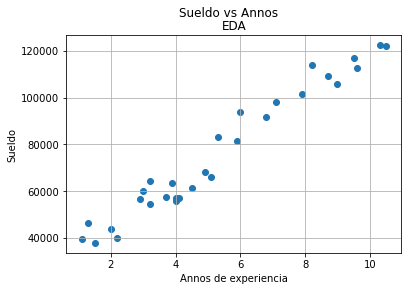

In [39]:
# Graficamos
plt.suptitle("Sueldo vs Annos")
plt.title("EDA")
plt.scatter(df["YearsExperience"], df["Salary"])
plt.ylabel("Sueldo")
plt.xlabel("Annos de experiencia")
plt.grid(1)
plt.show()

## Paso 2: Preprocesado

In [50]:
# Seleccion de datos
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

## Paso 3: Creacion de modelo

In [52]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

## Paso 4: Entrenamiento del modelo

In [53]:
modelo.fit(X_train, y_train)

LinearRegression()

In [54]:
modelo.score(X_train, y_train)

0.9381900012894278

## Paso 5: Evaluacion del modelo

In [55]:
modelo.score(X_test, y_test)

0.9749154407708353

## Paso 6: Implementacion o pronostico del modelo

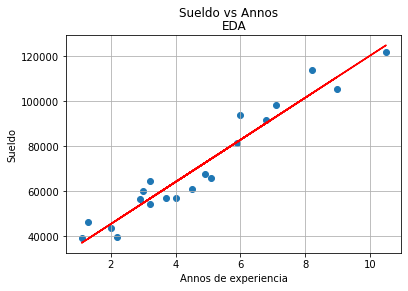

In [59]:
y_pred = modelo.predict(X_train)
# Graficamos
plt.suptitle("Sueldo vs Annos")
plt.title("EDA")
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="red")
plt.ylabel("Sueldo")
plt.xlabel("Annos de experiencia")
plt.grid(1)
plt.show()